In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import json
from scipy.spatial.transform import Rotation as scipy_rot

blender = cv2.imread('/scratches/octopus/fml35/datasets/pix3d_new/own_data/rendered_models/normals/bed/IKEA_MALM_2/elev_000_azim_90.0.png')
gwangbin = cv2.imread('/scratch/fml35/datasets/pix3d_new/own_data/real_images_3d/predicted_normals/bed/0001.png')
real_render = cv2.imread('/scratches/octopus/fml35/datasets/pix3d_new/own_data/real_images_3d/normals/bed/0001.png')

print(real_render.shape)
print(gwangbin.shape)

(244, 395, 3)
(244, 395, 3)


In [2]:
with open('/scratches/octopus/fml35/datasets/pix3d_new/pix3d.json','r') as f:
    data = json.load(f)

gt_R = data[0]["rot_mat"]


In [4]:
R_T = np.load('/scratches/octopus/fml35/experiments/leveraging_geometry_for_shape/test_output_all_s2/models/rotations/R_T_torch.npz')
render_rot = R_T["R"]
index = 16 + 9
R_render = render_rot[index]





In [5]:
# THIS WORKS IF ELEV = 000
# IF not then need to do something different with matrix multiplication
# maybe look at blender conversion 


for orientation,index in zip(["90.0","112.5","135.0","157.5"],[8,9,10,11]):
    blender = cv2.imread('/scratches/octopus/fml35/datasets/pix3d_new/own_data/rendered_models/normals/bed/IKEA_MALM_2/elev_000_azim_{}.png'.format(orientation))
    ns = ((blender / 255.) - 0.5) * 2
    
    # print(render_rot[index])
    # print(ns[145,150])
    print(np.matmul(np.linalg.inv(render_rot[index]),ns[140,80]))

[ 0.99215686 -0.01176471 -0.00392148]
[ 0.98704231 -0.00392157 -0.13871681]
[ 0.98163048 -0.01176471 -0.17747002]
[ 0.99419998 -0.00392157 -0.11043933]


[246  82 127]


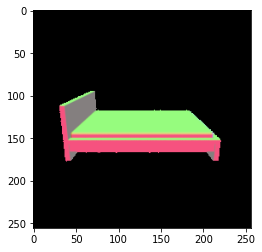

[ 0.9901057  -0.10415347 -0.00392149]
[-0.0822717   0.98887211 -0.01176469]
[232  87  65]


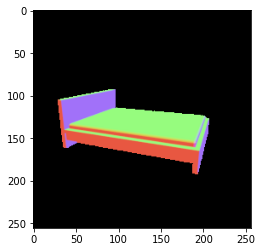

[ 0.99482837 -0.06228896 -0.13923173]
[-0.09089826  0.98656063  0.05666321]
[196 100  24]


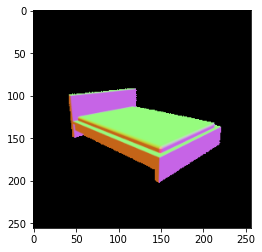

[ 0.97722124  0.0385508  -0.19410776]
[-0.1241621   0.97764761  0.11646464]
[160 113   5]


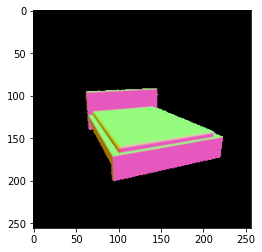

[ 0.98106029  0.14513703 -0.13217771]
[-0.17699909  0.96348998  0.1585354 ]


In [6]:
#  Checl ELEV = 015
# IF not then need to do something different with matrix multiplication
# maybe look at blender conversion 

for orientation,index,pix in zip(["90.0","112.5","135.0","157.5"],[16+8,16+9,16+10,16+11],[[160,100],[150,60],[150,85],[148,78]]):
    blender = cv2.imread('/scratches/octopus/fml35/datasets/pix3d_new/own_data/rendered_models/normals/bed/IKEA_MALM_2/elev_015_azim_{}.png'.format(orientation))
    print(blender[pix[0],pix[1]])
    ns = ((blender / 255.) - 0.5) * 2
    plt.imshow(blender)#[pix[0]-3:pix[0]+3,pix[1]-3:pix[1]+3])
    plt.show()
    # print(render_rot[index])
    # print(ns[145,150])
    rot = scipy_rot.from_matrix(render_rot[index])          
    start_rot = scipy_rot.from_euler('zyx',[np.pi,-np.pi/2,np.pi],degrees=False)      
    final_rot = scipy_rot.from_euler('y',np.pi/2,degrees=False)
    total_rot = final_rot * rot * start_rot
    print(np.matmul(total_rot.inv().as_matrix(),ns[pix[0],pix[1]]))

    # check center
    print(np.matmul(total_rot.inv().as_matrix(),ns[125,125]))

93.13929091031055
99.57396206628653
102.90195362848353


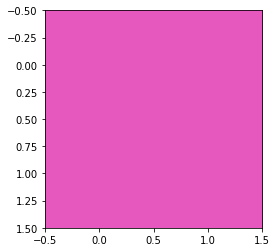

In [7]:
# check if for rendered image normals are actually orthogonal
n1 = ns[148,78]
n2 = ns[125,125]
n3 = ns[185,100]

plt.imshow(blender[185:187,100:102])

print(np.arccos(np.dot(n1,n2)) * 180/np.pi)
print(np.arccos(np.dot(n2,n3)) * 180/np.pi)
print(np.arccos(np.dot(n1,n3)) * 180/np.pi)

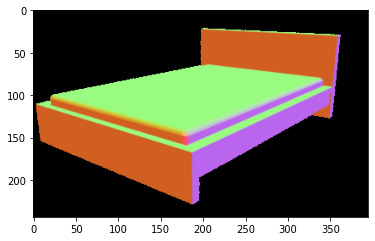

16.31307701287446
218.61156612964902
-0.05474002279874933
[[0.7813941591465821, 0.00095539348511137, -0.6240370624208909], [0.17456672296585038, 0.9597407704535225, 0.2200547949085482], [0.5991240499968018, -0.2808856364297893, 0.749769052417384]]
[-0.00122268 -0.67389859 -0.2854799 ]
[ 0.63137255 -0.25490196 -0.74117647]
[ 0.10092525 -0.235088   -0.97339437]
[-0.12446923  0.97295764 -0.12694628]
[0.91693367 0.05141279 0.38455823]


In [8]:
# Why are these not exactly aligned ?? 

real_render = cv2.imread('/scratches/octopus/fml35/datasets/pix3d_new/own_data/real_images_3d/normals/bed/0001.png')

ns = ((real_render / 255.) - 0.5) * 2
plt.imshow(real_render)#[150:152,240:242])#[pix[0]-3:pix[0]+3,pix[1]-3:pix[1]+3])
plt.show()
# print(render_rot[index])
# print(ns[145,150])
# rot = scipy_rot.from_matrix(gt_R)
# euler = rot.as_euler('ZYX')
# reordered = [euler[2],euler[1],euler[0]]
# new_rot = rot.from_euler('ZYX',reordered)

rot = list(scipy_rot.from_matrix(gt_R).as_euler('yzx', degrees=True))
true_elev = -rot[2]
true_azim = 180 - rot[0]
print(true_elev)
print(true_azim)
print(rot[1])

rot = scipy_rot.from_matrix(gt_R)
angles = rot.as_euler('zyx')
print(gt_R)
print(angles)
changed_angles = [angles[2],angles[1],angles[0]]
new_rot = scipy_rot.from_euler('zyx',changed_angles)
# print(np.matmul(new_rot.inv().as_matrix(),ns[pix[0],pix[1]]))

# rot = mathutils.Matrix(gt_R)
# R = rot.to_euler('ZYX')
# a,b,c = R
# for k,rot in enumerate([[a,b,c],[a,c,b],[b,a,c],[b,c,a],[c,a,b],[c,b,a]]):
# for k,rot in enumerate([[c,b,a]]):


# start_rot = scipy_rot.from_euler('zyx',[np.pi,-np.pi/2,np.pi],degrees=False)      
# final_rot = scipy_rot.from_euler('y',np.pi/2,degrees=False)
# total_rot = final_rot * rot * start_rot
total_rot = new_rot
print(ns[150,100])
print(np.matmul(total_rot.inv().as_matrix(),ns[150,100]))
print(np.matmul(total_rot.inv().as_matrix(),ns[100,150]))
print(np.matmul(total_rot.inv().as_matrix(),ns[150,240]))

In [31]:
# check if for real image normals are actually orthogonal

real_render = cv2.imread('/scratches/octopus/fml35/datasets/pix3d_new/own_data/real_images_3d/normals/bed/0001.png')

flat_channels = real_render.reshape(-1,3)
print((flat_channels > 0).any(axis=1))
no_black = flat_channels[(flat_channels > 0).any(axis=1),:]

# thought that maybe z coordinate is normalised differently because always pointing twoards observer but doesnt look like it
# https://blender.stackexchange.com/questions/52865/creating-normal-maps-from-a-texture

print(no_black.shape)
print('np.max(real_render.reshape(-1,3),axis=0)',np.max(no_black,axis=0))
print('np.min(real_render.reshape(-1,3),axis=0)',np.min(no_black,axis=0))
print('np.max(real_render.reshape(-1,3),axis=0)',np.max(real_render.reshape(-1,3),axis=0))
print('np.min(real_render.reshape(-1,3),axis=0)',np.min(real_render.reshape(-1,3),axis=0))

# real_render = cv2.cvtColor(real_render, cv2.COLOR_BGR2RGB)

print(real_render[150,100])
print(real_render[100,150])
print(real_render[150,240])

# ns = ((real_render / 255.) - np.array([0.5,0.5,0.5]) * np.array([2,2,2]))
ns = ((real_render / 255.) - 0.5) * 2

n1 = ns[150,100]
n2 = ns[100,150]
n3 = ns[150,240]
print(n1)
print(n2)
print(n3)
print(np.linalg.norm(n1))
print(np.linalg.norm(n2))
print(np.linalg.norm(n3))
print(np.arccos(np.dot(n1,n2)) * 180/np.pi)
print(np.arccos(np.dot(n2,n3)) * 180/np.pi)
print(np.arccos(np.dot(n1,n3)) * 180/np.pi)




[False False False ... False False False]
(41479, 3)
np.max(real_render.reshape(-1,3),axis=0) [243 251 237]
np.min(real_render.reshape(-1,3),axis=0) [153  79  15]
np.max(real_render.reshape(-1,3),axis=0) [243 251 237]
np.min(real_render.reshape(-1,3),axis=0) [0 0 0]
[208  95  33]
[153 251 127]
[186 101 237]
[ 0.63137255 -0.25490196 -0.74117647]
[ 0.2         0.96862745 -0.00392157]
[ 0.45882353 -0.20784314  0.85882353]
1.0064536083798588
0.9890674989571094
0.9956383156132095
96.76076353338473
96.4840026535116
107.08988517683207


[ 0.63137255 -0.25490196 -0.74117647]
[ 0.45882353 -0.20784314  0.85882353]
96.76076353338473
96.4840026535116
107.08988517683207


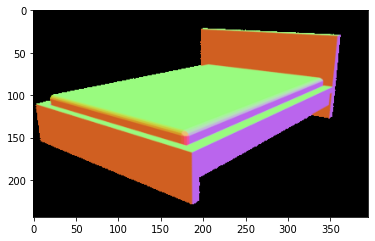

In [ ]:

real_render_remeshed = cv2.imread('/scratches/octopus/fml35/datasets/pix3d_new/own_data/real_images_3d/normals_debug_remeshed/bed/0001_1.png')
plt.imshow(real_render_remeshed)

ns = ((real_render_remeshed / 255.) - 0.5) * 2
# check if for real image normals are actually orthogonal
n1 = ns[150,100]
n2 = ns[100,150]
n3 = ns[150,240]
print(n1)
print(n3)
print(np.arccos(np.dot(n1,n2)) * 180/np.pi)
print(np.arccos(np.dot(n2,n3)) * 180/np.pi)
print(np.arccos(np.dot(n1,n3)) * 180/np.pi)

In [ ]:
R_T_same_pix = np.load('/scratch/fml35/experiments/exp_024_debug/models/rotations/R_T_blender_same_pix3d.npz')
import mathutils
print(R_T["R"][17])

# print(scipy_rot.from_matrix(R_T["R"][17]).as_euler('XYZ'))
print(scipy_rot.from_matrix(R_T["R"][17]).as_euler('XZY'))
# print(scipy_rot.from_matrix(R_T["R"][17]).as_euler('YZX'))
# print(scipy_rot.from_matrix(R_T["R"][17]).as_euler('YXZ'))
# print(scipy_rot.from_matrix(R_T["R"][17]).as_euler('ZXY'))
# print(scipy_rot.from_matrix(R_T["R"][17]).as_euler('ZYX'))
# newMat = mathutils.Matrix(R_T["R"][17])
# print(newMat)
# print(newMat.to_euler)

[[-0.9238795  -0.09904578 -0.36964387]
 [ 0.          0.9659259  -0.25881907]
 [ 0.3826835  -0.23911764 -0.89239913]]
[-0.24267408  0.09920844 -2.76100039]


[246  82 127]


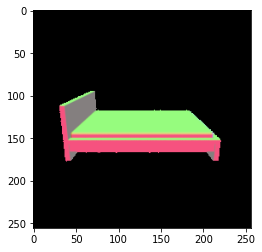

[ 0.9901057  -0.10415347 -0.00392149]
[0.77601046 0.07201624 0.61951114]
[-0.0822717   0.98887211 -0.01176469]
[232  87  65]


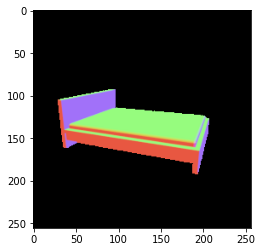

[ 0.99482836 -0.06228896 -0.13923174]
[0.86417933 0.08324407 0.50913002]
[-0.09089826  0.98656063  0.05666321]
[196 100  24]


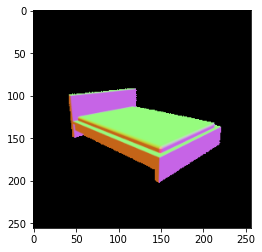

[ 0.97722124  0.0385508  -0.19410777]
[0.88476224 0.16487474 0.42911239]
[-0.1241621   0.97764761  0.11646464]
[160 113   5]


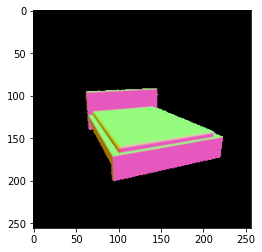

[ 0.98106029  0.14513703 -0.13217772]
[0.84921724 0.28146806 0.44790714]
[-0.17699909  0.96348998  0.1585354 ]


In [ ]:
for orientation,index,pix in zip(["90.0","112.5","135.0","157.5"],[16+8,16+9,16+10,16+11],[[160,100],[150,60],[150,85],[148,78]]):
    blender = cv2.imread('/scratches/octopus/fml35/datasets/pix3d_new/own_data/rendered_models/normals/bed/IKEA_MALM_2/elev_015_azim_{}.png'.format(orientation))
    print(blender[pix[0],pix[1]])
    ns = ((blender / 255.) - 0.5) * 2
    plt.imshow(blender)#[pix[0]-3:pix[0]+3,pix[1]-3:pix[1]+3])
    plt.show()
    # print(render_rot[index])
    # print(ns[145,150])
    rot = scipy_rot.from_matrix(R_T_same_pix["R"][index])
    
    angles = rot.as_euler('zyx')
    changed_angles = [angles[2],angles[1],angles[0]]
    new_rot = scipy_rot.from_euler('zyx',changed_angles)
    print(np.matmul(new_rot.inv().as_matrix(),ns[pix[0],pix[1]]))

    # check center
    print(np.matmul(new_rot.inv().as_matrix(),ns[125,125]))

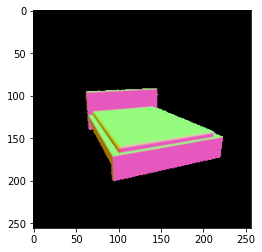

[150 252 126]
[ 0.17647059  0.97647059 -0.01176471]
[-1. -1. -1.]
[0 0 0]


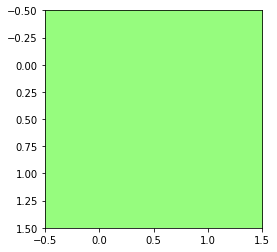

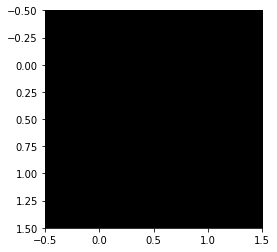

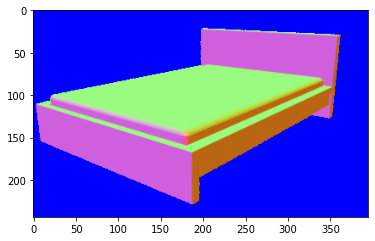

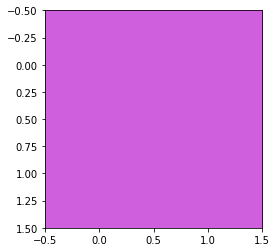

In [ ]:


ns_real = ((gwangbin / 255.) - 0.5) * 2

ns = ((blender / 255.) - 0.5) * 2
new_ns_render = np.stack((ns[:,:,0],ns[:,:,1],ns[:,:,2]),axis=2)


img = np.round(((new_ns_render / 2 + 0.5 ) * 255)).astype(int)

# multiply rendered by inverse of transformation and then multiply by gt R

# TODO: why not inverse for R_render ?

ns_rendered_transf = np.matmul(gt_R,np.matmul(R_render,new_ns_render[155,60]))

# print('before transf',new_ns_render[155,60])
# print('after transf',ns_rendered_transf)
# print('pred',ns_real[300,150])

plt.imshow(img)
plt.show()
print(img[145,150])
print(new_ns_render[145,150])
print(new_ns_render[120,60])
print(blender[120,60])
plt.imshow(img[145:147,150:152])
plt.show()
plt.imshow(img[120:122,60:62])
plt.show()

# plt.imshow(img[155:157,60:62])
# plt.show()

# gwangbin = cv2.cvtColor(gwangbin, cv2.COLOR_BGR2RGB)
# plt.imshow(gwangbin)
# plt.show()

# plt.imshow(gwangbin[300:302,150:152])
# plt.show()

# real_render = cv2.cvtColor(real_render, cv2.COLOR_BGR2RGB)

# plt.imshow(real_render)
# plt.show()

ns = ((real_render / 255.) - 0.5) * 2
new_ns_real_render = np.stack((ns[:,:,0],ns[:,:,1],-ns[:,:,2]),axis=2)

img = np.round(((new_ns_real_render / 2 + 0.5 ) * 255)).astype(int)
plt.imshow(img)
plt.show()

plt.imshow(img[150:152,50:52])
plt.show()

In [ ]:
new_ns_render_value = new_ns_render[175,150]
new_ns_render_real_value = new_ns_real_render[150,50]


R_render_inv = np.linalg.inv(R_render)
print(new_ns_render_value)
print(new_ns_render_real_value)

after_render = np.matmul(R_render_inv,new_ns_render_real_value)
print(after_render)
transformed_rendered = np.matmul(gt_R,after_render)
print(transformed_rendered)


[ 0.80392157 -0.30980392  0.48235294]
[ 0.63137255 -0.25490196  0.74117647]
[ 0.29967616 -0.00645324  0.9607816 ]
[-0.36540429  0.25754465  0.90172013]


In [ ]:
gt_R = data[0]["rot_mat"]
rot = scipy_rot.from_matrix(R_render)
                
start_rot = scipy_rot.from_euler('zyx',[np.pi,-np.pi/2,np.pi],degrees=False)      
final_rot = scipy_rot.from_euler('y',np.pi/2,degrees=False)
total_rot = final_rot * rot * start_rot

after_render = np.matmul(total_rot.inv().as_matrix(),new_ns_render_value)


In [ ]:
# rendered image

# for 202.5 and 000
# print(np.matmul(total_rot.as_matrix(),new_ns_render[150,100]))
# print(np.matmul(total_rot.as_matrix(),new_ns_render[140,170]))

# for 202.5 and 015
print(np.matmul(total_rot.inv().as_matrix(),new_ns_render[180,150][[2,1,0]]))
print(np.matmul(total_rot.inv().as_matrix(),new_ns_render[130,130][[2,1,0]]))
print(np.matmul(total_rot.inv().as_matrix(),new_ns_render[175,165][[2,1,0]]))

[ 0.21346981 -0.26353355  0.92731517]
[-0.32845929  0.92290634  0.1585354 ]
[ 0.21346981 -0.26353355  0.92731517]


In [ ]:
# real image
# pointing straight up is positive y
print(np.matmul(np.linalg.inv(gt_R),new_ns_real_render[100,100][[0,1,2]]))
print(np.matmul(np.linalg.inv(gt_R),new_ns_real_render[100,100][[0,2,1]]))
print(np.matmul(np.linalg.inv(gt_R),new_ns_real_render[100,100][[1,0,2]]))
print(np.matmul(np.linalg.inv(gt_R),new_ns_real_render[100,100][[1,2,0]]))
print(np.matmul(np.linalg.inv(gt_R),new_ns_real_render[100,100][[2,0,1]]))
print(np.matmul(np.linalg.inv(gt_R),new_ns_real_render[100,100][[2,1,0]]))
# outside of screen is positive z
print(np.matmul(np.linalg.inv(gt_R),new_ns_real_render[150,50][[2,1,0]]))
# to the right is positive x
print(np.matmul(np.linalg.inv(gt_R),new_ns_real_render[180,200][[2,1,0]]))


[0.32771846 0.92872082 0.09128397]
[ 0.73729141 -0.26811877  0.60230243]
[ 0.79414268  0.19177206 -0.5575082 ]
[ 0.87738922 -0.05148802 -0.45364266]
[ 0.61830564 -0.08012164  0.76781064]
[0.29197922 0.87345788 0.36065772]
[ 0.91292404 -0.42127517 -0.04523039]
[-0.43246997 -0.32917299  0.83421252]


In [ ]:
# Try undoing transformation of real for building understanding
after_inv_real = np.matmul(gt_R,new_ns_render_real_value)
print(after_inv_real)

[0.0305857  0.02867627 1.00557996]


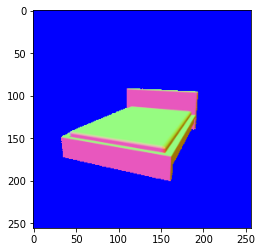

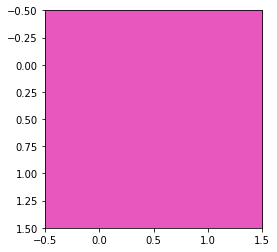

before transf [ 0.81960784 -0.31764706  0.49019608]
after transf [ 0.67841804 -0.24738259  0.70107039]


IndexError: index 300 is out of bounds for axis 0 with size 244

In [ ]:
# before had no inverse and new_ns_render = np.stack((ns[:,:,0],ns[:,:,1],-ns[:,:,2]),axis=2)


# Test other orientation
blender = cv2.imread('/scratches/octopus/fml35/datasets/pix3d_new/own_data/rendered_models/normals/bed/IKEA_MALM_2/elev_015_azim_202.5.png')
index = 16 + 9
R_render = render_rot[index]

ns = ((blender / 255.) - 0.5) * 2
new_ns_render = np.stack((ns[:,:,0],ns[:,:,1],-ns[:,:,2]),axis=2)

img = np.round(((new_ns_render / 2 + 0.5 ) * 255)).astype(int)
plt.imshow(img)
plt.show()
plt.imshow(img[155:157,60:62])
plt.show()
ns_rendered_transf = np.matmul(gt_R,np.matmul(R_render,new_ns_render[155,60]))

print('before transf',new_ns_render[155,60])
print('after transf',ns_rendered_transf)
print('pred',ns_real[300,150])


(256, 256, 3)
(256, 256, 3, 1)
-1.5094609820430178
0.9571962905343951


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


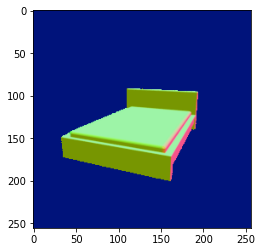

In [ ]:
gt_R_batch = np.tile(gt_R,(256,256,1,1))
R_render_batch = np.tile(R_render,(256,256,1,1))
print(new_ns_render.shape)
transformed_normals = np.matmul(gt_R_batch,np.matmul(R_render_batch,new_ns_render[...,np.newaxis]))
print(transformed_normals.shape)

transformed_normals = np.stack((transformed_normals[:,:,0],transformed_normals[:,:,1],-transformed_normals[:,:,2]),axis=2)
print(np.min(transformed_normals))
print(np.max(transformed_normals))
img = np.round(((np.squeeze(transformed_normals) / 2 + 0.5 ) * 255)).astype(int)
plt.imshow(img)

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]


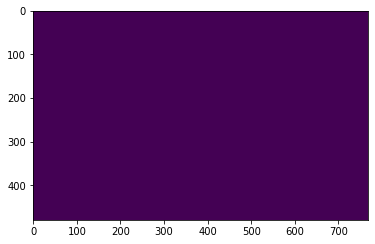

False
True


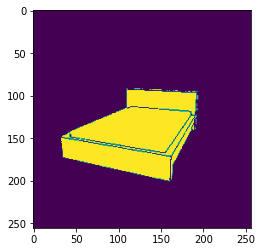

AssertionError: 

In [ ]:
length_real = np.linalg.norm(ns_real,axis=2)
mask = np.abs(length_real - 1) < 0.1
print(mask[:3,:3])
plt.imshow(mask)
plt.show()
assert (np.abs(length_real - 1) < 0.1).all()

length_render = np.linalg.norm(new_ns_render,axis=2)

mask = np.abs(length_render - 1) < 0.1

print(mask[0,0])
print(mask[150,100])

plt.imshow(mask)
plt.show()
assert (np.abs(length_render - 1) < 0.1).all()